# Workshop 3: Trabalho prático de Classificação

<a id="section_intro"></a>
##  Introdução

Este trabalho consite na aplicação de três modelos de classificação onde utilizamos os dados de pacientes com câncer de mama obtido a partir da atualização de novembro de 2017 do Programa SEER do NCI, que fornece informações sobre estatísticas de câncer de base populacional. O conjunto de dados envolveu pacientes do sexo feminino com câncer de mama de ducto infiltrante e carcinoma lobular (SEER primary cita recode NOS histology codes 8522/3) diagnosticados em 2006-2010. Pacientes com tamanho de tumor desconhecido, LNs regionais examinados, LNs regionais positivos e pacientes cujos meses de sobrevida foram inferiores a 1 mês foram excluídos; assim, 4.024 pacientes foram finalmente incluídos. Onde vamos classificar se o paciente sobrevive ou morre a doença.

## Importando pacotes que serão utilizados:

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_theme(style='white')
sns.color_palette('hls', 8)

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Importando os dados que serão utilizados

In [123]:
df = pd.read_csv('../Workshop-3-DS-Digital-House/Breast_Cancer.csv')
df_orig = df.copy()

## Checando dados

In [124]:
df_orig.head()

,Age,Race,Marital Status,Unnamed: 3,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,43,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,T2,N3,IIIC,Moderately differentiated; Grade II,Regional,40,Positive,Positive,19,11,1,Alive
1,47,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,T2,N2,IIIA,Moderately differentiated; Grade II,Regional,45,Positive,Positive,25,9,2,Alive
2,67,White,Married (including common law),NaN,T2,N1,IIB,Poorly differentiated; Grade III,Regional,25,Positive,Positive,4,1,2,Dead
3,46,White,Divorced,NaN,T1,N1,IIA,Moderately differentiated; Grade II,Regional,19,Positive,Positive,26,1,2,Dead
4,63,White,Married (including common law),NaN,T2,N2,IIIA,Moderately differentiated; Grade II,Regional,35,Positive,Positive,21,5,3,Dead


## Colunas do data set


1. Age - Idade no momento do diagnóstico
2. Race - Raça do paciente
3. Marital Status - Estado Civil
4. T Stage - Indica o tamanho do tumor primário(no ductor mamario) e se dessiminou para a vizinhaça.
    - T1 - sem evidência de tumor primario
    - T2 - Tumor de 1 a 2 centimetros
    - T3 - Tumor de 2 a 5 centimetros
    - T4 - Tumor com mais do que 5 centimetros
5. N Stage - Existência de disseminação da doença para os linfonodos regionais.
6. 6th Stage Grade - combinação de variáveis para denotar o estágio (mesmo campo que GRADE)
7. A Stage - Localidade do cancer (regional ou espalhado pelo corpo)
8. Tumor Size - Tamanho do cancer em milimetros
9. Estrogen Status - Status do estrogênio na paciente (null para casos em que não há cancer de mama)
10. Progesterone Status - Status da progesterona na paciente (null para casos em que não há cancer de mama)
11. Regional Node Examined - Quantidade de nódulos regionais removidos e inspecionados pelo patologista
12. Reginal Node Positive - quantidade de nódulos examinados que contém metastases
13. Survival Months - tempo de sobrevivência
14. Status - Status da paciente (vivo ou morto)

In [125]:
df_orig[['Age','Tumor Size', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months']].describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


## Removendo, ajustando e manipulando informações

###  removendo coluna "unamed" e renomeando colunas para utilizar

In [126]:
df = df.drop(['Unnamed: 3'], axis=1)
df.rename(columns = {'Race ': 'Race',
                     'Marital Status': 'Marital_Status',
                     'T Stage ': 'T_Stage',
                     'N Stage': 'N_Stage',
                     '6th Stage': '6th_Stage',
                     'A Stage': 'A_Stage',
                     'Tumor Size': 'Tumor_Size',
                     'Estrogen Status': 'Estrogen_Status',
                     'Progesterone Status': 'Progesterone_Status',
                     'Regional Node Examined': 'Regional_Node_Examined',
                     'Reginol Node Positive': 'Regional_Node_Positive',
                     'Survival Months': 'Survival_Months'}, 
            inplace=True)

In [127]:
df.columns

Index(['Age', 'Race', 'Marital_Status', 'T_Stage', 'N_Stage', '6th_Stage',
       'Grade', 'A_Stage', 'Tumor_Size', 'Estrogen_Status',
       'Progesterone_Status', 'Regional_Node_Examined',
       'Regional_Node_Positive', 'Survival_Months', 'Status'],
      dtype='object')

### checando nulos

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital_Status          4024 non-null   object
 3   T_Stage                 4024 non-null   object
 4   N_Stage                 4024 non-null   object
 5   6th_Stage               4024 non-null   object
 6   Grade                   4024 non-null   object
 7   A_Stage                 4024 non-null   object
 8   Tumor_Size              4024 non-null   int64 
 9   Estrogen_Status         4024 non-null   object
 10  Progesterone_Status     4024 non-null   object
 11  Regional_Node_Examined  4024 non-null   int64 
 12  Regional_Node_Positive  4024 non-null   int64 
 13  Survival_Months         4024 non-null   int64 
 14  Status                  4024 non-null   object
dtypes: i

### Manipulando variáveis para ajudar na visualização

In [129]:
# convertendo a categoria 'race'
df['Race'] = df['Race'].replace(
    'Other (American Indian/AK Native, Asian/Pacific Islander)', 'Other'
)

# ajustando categoria Marital_Status
df['Marital_Status'] = df['Marital_Status'].replace(
    ['Married (including common law)', 'Single (never married)'] , ['Married', 'Single']
)

df['Grade'] = df['Grade'].replace(
    ['Moderately differentiated; Grade II', 'Poorly differentiated; Grade III', 'Well differentiated; Grade I', 'Undifferentiated; anaplastic; Grade IV'],
     ['Moderately_differentiated', 'Poorly_differentiated', 'Well_differentiated', 'Undifferentiated']
)

In [130]:
df['Grade'].value_counts()

Moderately_differentiated    2351
Poorly_differentiated        1111
Well_differentiated           543
Undifferentiated               19
Name: Grade, dtype: int64

## Checando variáveis

### Distribuição de idade

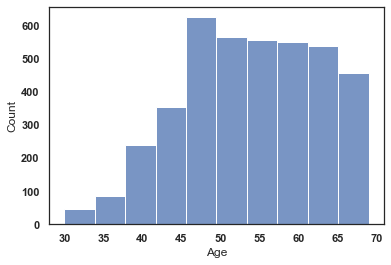

In [131]:
sns.histplot(df, x='Age', bins= 10)
plt.show()

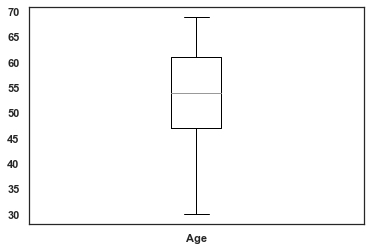

In [132]:
plt.boxplot(df.Age, labels=['Age']);

### Distribuição de etnias

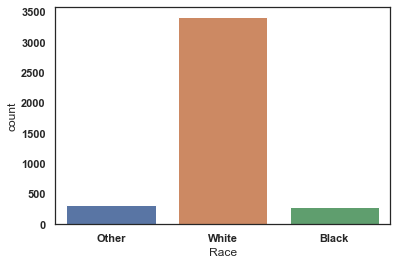

In [133]:
sns.countplot(x='Race', data = df)
plt.show()

### Estado Civil

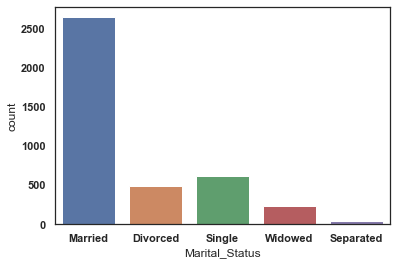

In [134]:
sns.countplot(x='Marital_Status', data = df)
plt.show()

### Estágio do cancer

Lembrando que:
* T Stage - estagio do cancer
    - T1 - sem evidência de tumor primario
    - T2 - Tumor de 1 a 2 centimetros
    - T3 - Tumor de 2 a 5 centimetros
    - T4 - Tumor com mais do que 5 centimetros

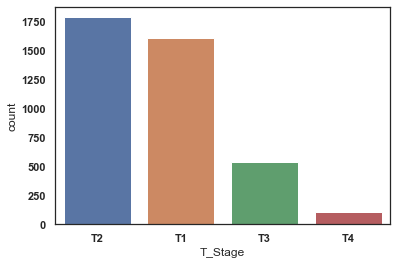

In [135]:
sns.countplot(x='T_Stage', data = df)
plt.show()

### estágio do cancer (análogo à GRADE)

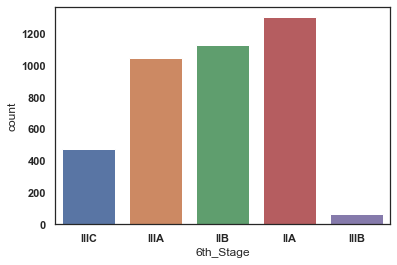

In [136]:
sns.countplot(x='6th_Stage', data = df)
plt.show()

### Diferenciação do tipo de cancer

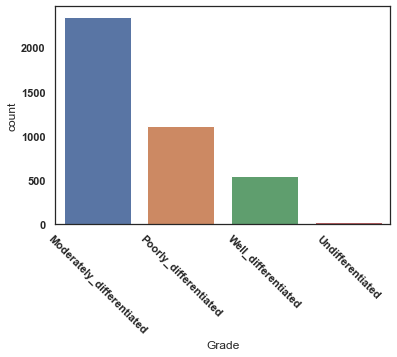

In [137]:
sns.countplot(x='Grade', data = df)
plt.xticks(rotation = -45)
plt.show()

### Classificação da posição do câncer

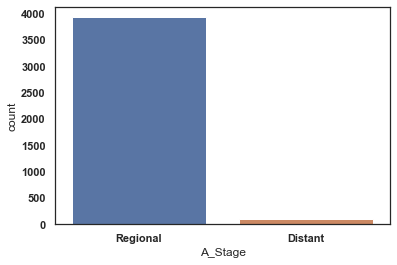

In [138]:
sns.countplot(x='A_Stage', data = df)
plt.show()

### Distribuição de tamanho dos tumores

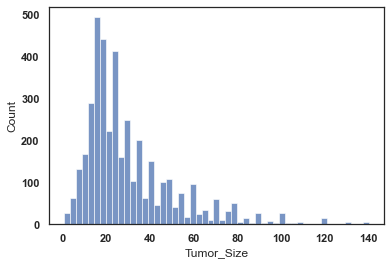

In [139]:
sns.histplot(x='Tumor_Size', data = df)
plt.show()

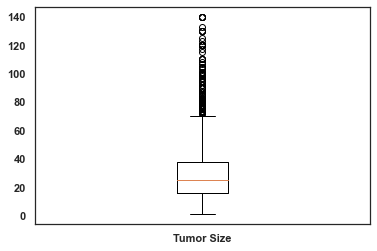

In [140]:
plt.boxplot(df.Tumor_Size, labels=['Tumor Size']);

In [141]:
tumor_size_q1 = df['Tumor_Size'].quantile(0.25)
tumor_size_q3 = df['Tumor_Size'].quantile(0.75)

tumor_size_amp = tumor_size_q3 - tumor_size_q1
tumor_size_limits = [tumor_size_q1 - 1.5 * tumor_size_amp, tumor_size_q3 + 1.5 * tumor_size_amp]

df = df.drop(df[df['Tumor_Size'] > tumor_size_limits[1]].index)
df = df.drop(df[df['Tumor_Size'] < tumor_size_limits[0]].index)

### Status do estrogênio na paciente

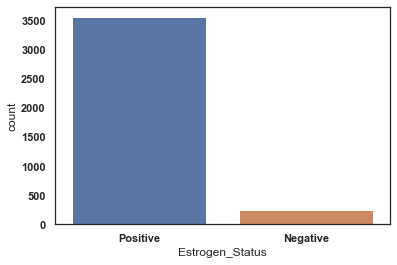

In [142]:
sns.countplot(x = 'Estrogen_Status', data = df)
plt.show()

### Status da progesterona na paciente

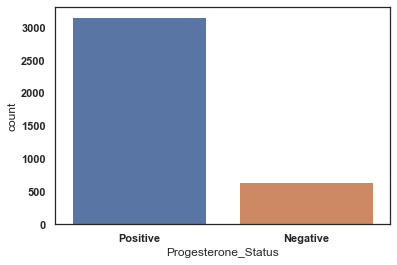

In [143]:
sns.countplot(x = 'Progesterone_Status', data = df)
plt.show()

### Quantidade de nódulos regionais examinados

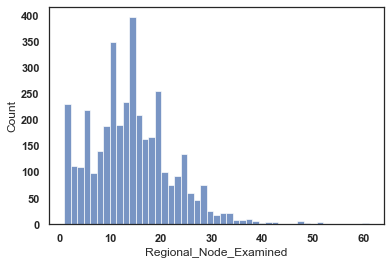

In [144]:
sns.histplot(x = 'Regional_Node_Examined', data = df)
plt.show()

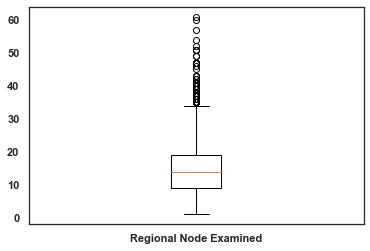

In [145]:
plt.boxplot(df.Regional_Node_Examined, labels=['Regional Node Examined']);

In [146]:
regional_node_exam_q1 = df['Regional_Node_Examined'].quantile(0.25)
regional_node_exam_q3 = df['Regional_Node_Examined'].quantile(0.75)

regional_node_exam_amp = regional_node_exam_q3 - regional_node_exam_q1
regional_node_exam_limits = [regional_node_exam_q1 - 1.5 * regional_node_exam_amp, regional_node_exam_q3 + 1.5 * regional_node_exam_amp]

df = df.drop(df[df['Regional_Node_Examined'] > regional_node_exam_limits[1]].index)
df = df.drop(df[df['Regional_Node_Examined'] < regional_node_exam_limits[0]].index)

### Quantidade de nódulos regionais examinados - positivos para metastase (câncer)

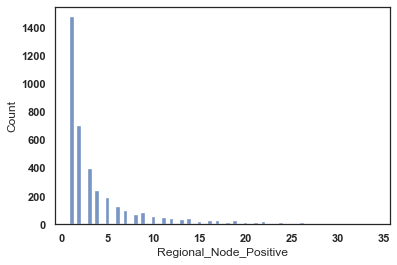

In [147]:
sns.histplot(x = 'Regional_Node_Positive', data = df)
plt.show()

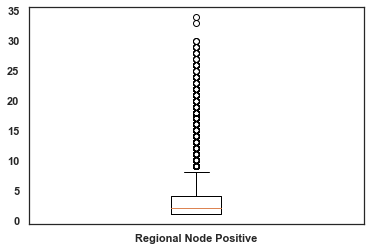

In [148]:
plt.boxplot(df.Regional_Node_Positive, labels=['Regional Node Positive']);

In [149]:
regional_node_pos_q1 = df['Regional_Node_Positive'].quantile(0.25)
regional_node_pos_q3 = df['Regional_Node_Positive'].quantile(0.75)

regional_node_pos_amp = regional_node_pos_q3 - regional_node_pos_q1
regional_node_pos_limits = [regional_node_pos_q1 - 1.5 * regional_node_pos_amp, regional_node_pos_q3 + 1.5 * regional_node_pos_amp]

df = df.drop(df[df['Regional_Node_Positive'] > regional_node_pos_limits[1]].index)
df = df.drop(df[df['Regional_Node_Positive'] < regional_node_pos_limits[0]].index)

### Distribuição de "meses de sobrevivência da paciente"

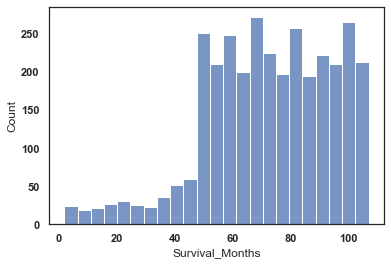

In [150]:
sns.histplot(x = 'Survival_Months', data = df)
plt.show()

### proporção de pacientes vivos/mortos

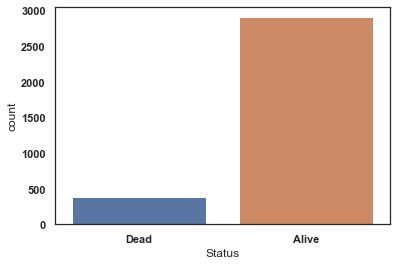

In [151]:
sns.countplot(x = 'Status', data = df)
plt.show()

In [152]:
df.Status.value_counts()

Alive    2902
Dead      383
Name: Status, dtype: int64

In [153]:
print('Dataset após limpeza de outliers: ', df.shape)

Dataset após limpeza de outliers:  (3285, 15)


### Correlações

Legenda Status: Dead = 0, Alive = 1


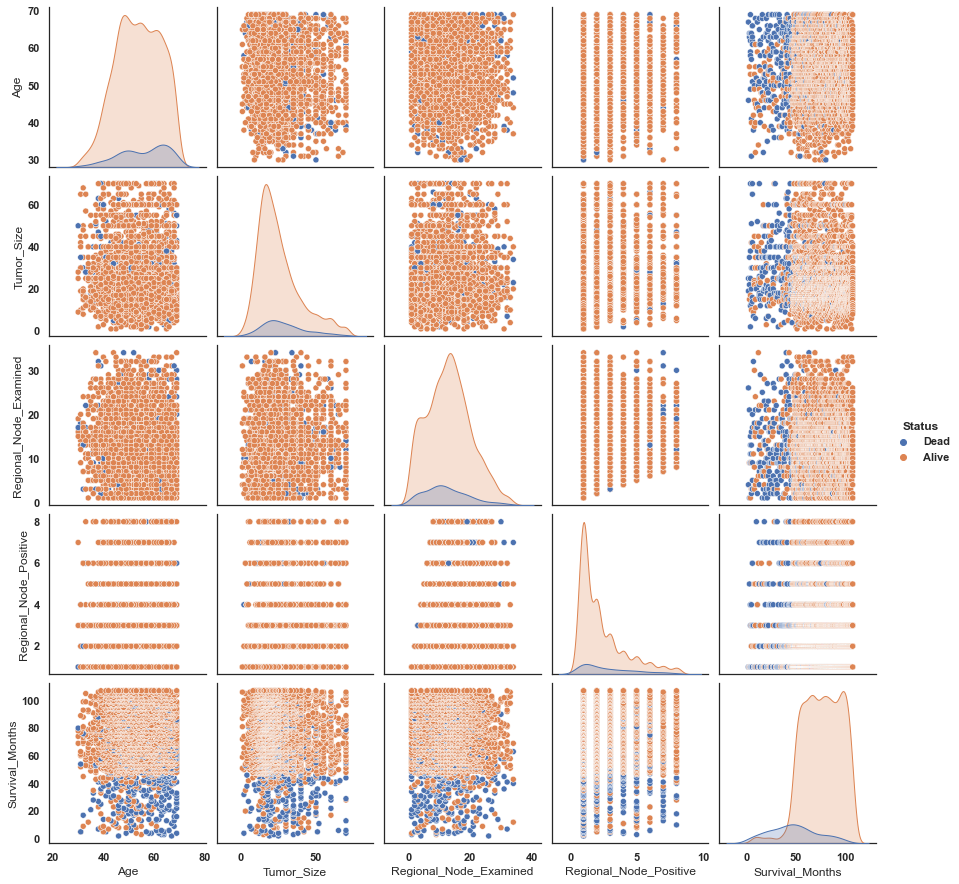

In [154]:
sns.pairplot(df, hue = 'Status')
print('Legenda Status: Dead = 0, Alive = 1')
plt.show()

In [155]:
# Modificando Coluna Status para Dummy (0 = Dead, 1 = Alive)
df['Status'].replace(['Dead','Alive'],[0,1], inplace = True)
df.sample(5)

,Age,Race,Marital_Status,T_Stage,N_Stage,6th_Stage,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Regional_Node_Positive,Survival_Months,Status
2388,46,White,Married,T1,N1,IIA,Poorly_differentiated,Regional,17,Positive,Positive,14,1,79,1
1903,50,White,Married,T2,N1,IIB,Poorly_differentiated,Regional,41,Negative,Negative,17,1,71,1
2288,39,White,Married,T1,N1,IIA,Moderately_differentiated,Regional,6,Positive,Positive,27,3,77,1
1483,57,White,Divorced,T2,N2,IIIA,Well_differentiated,Regional,25,Positive,Negative,14,4,64,1
1152,51,White,Single,T3,N2,IIIA,Poorly_differentiated,Regional,50,Positive,Positive,18,6,59,0


### Correlação entre as variáveis

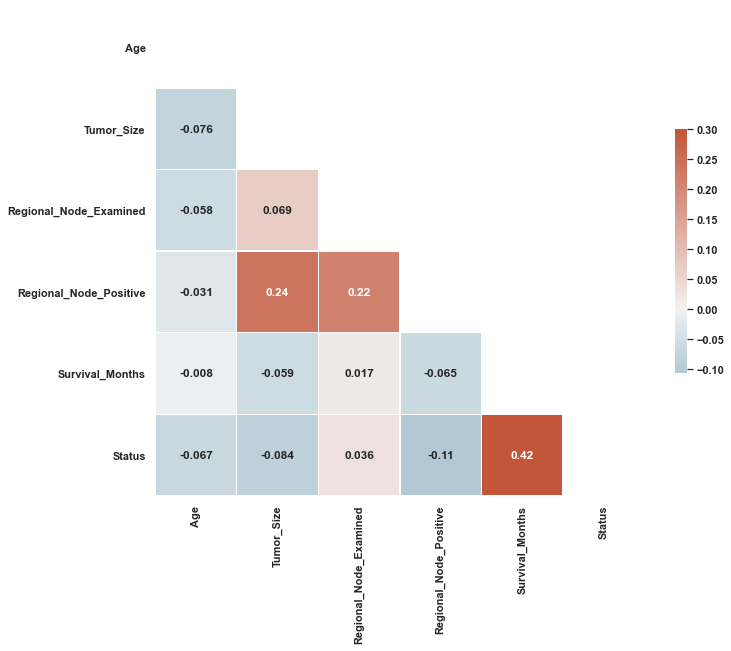

In [156]:
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.show()

## Processamento pré-modelagem

In [157]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # para normalizar os dados
from sklearn.model_selection import KFold, GridSearchCV# use for cross validation and for tuning parameter


#### Codificação das Variáveis

In [158]:
from sklearn.preprocessing import OrdinalEncoder

#Codificando variáveis categóricas ordinais
ord_enc = OrdinalEncoder(dtype = int)
for col in ['T_Stage', 'N_Stage', '6th_Stage', 'Grade']:
    df[col] = ord_enc.fit_transform(df[col].values.reshape(-1, 1))
    
#Criando dummies para variáveis categóricas não ordinais
df = pd.get_dummies(df, columns = ['Race', 'Marital_Status', 'A_Stage', 'Estrogen_Status', 'Progesterone_Status'], drop_first = True)

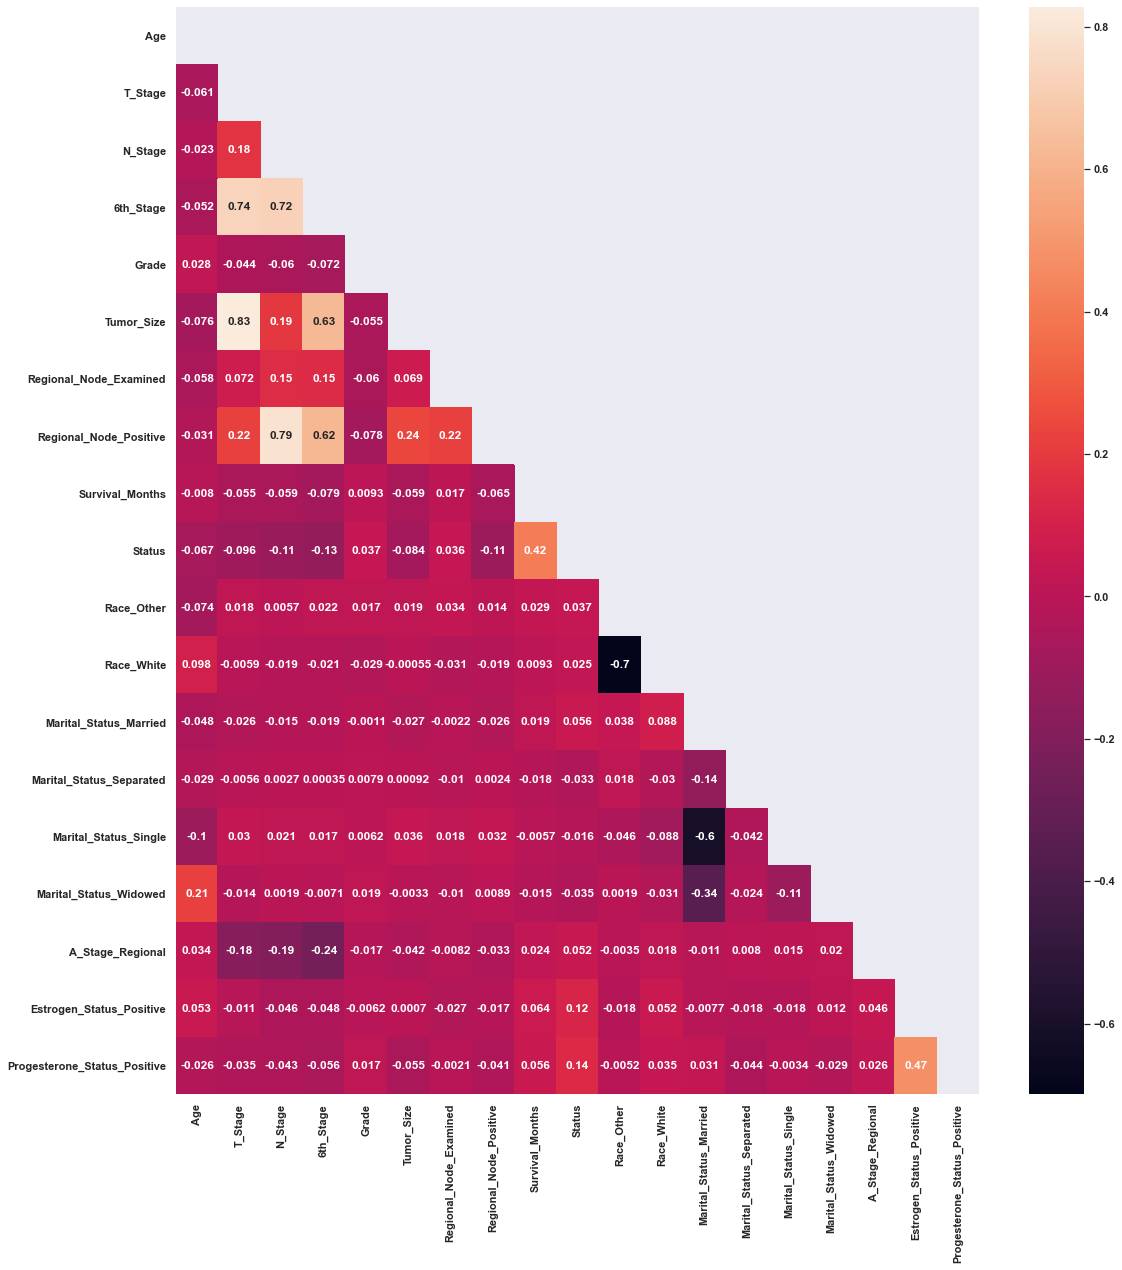

In [159]:
sns.set(rc={'figure.figsize':(18,20)})
sns.heatmap(df.corr(), annot=True, mask = np.triu(np.ones_like(df.corr(), dtype=bool)));

#### Definindo Features e Target

In [160]:
features = ['Age', 'T_Stage', 'N_Stage', 'Grade', 'Tumor_Size',
            '6th_Stage', 'Regional_Node_Examined', 'Regional_Node_Positive',
            'Survival_Months', 'Race_Other', 'Race_White',
            'Marital_Status_Married', 'Marital_Status_Separated',
            'Marital_Status_Single', 'Marital_Status_Widowed',
            'A_Stage_Regional', 'Progesterone_Status_Positive'
            ]

# Selecionamos as melhores features de acordo com Heatmap final da célula anterior,
# usando o método Summary do StatsModels em um modelo somente para fins de seleção de features (tabela de coeficientes e testes de hipótese)
# e de acordo com a métrica VIF (Variance Inflation Factor), que detecta varíaveis com alta Multicolinearidade

features_seletas = ['Tumor_Size', 'Regional_Node_Examined', 'Regional_Node_Positive',
                    'Survival_Months', 'Estrogen_Status_Positive', 'A_Stage_Regional', 
                    'Race_White', 'Age'
                    ]

X = df[features_seletas]
y = df['Status']

#### Splits

In [161]:
# Fazendo Split tanto para Dataset com features JÁ SELECIONADAS quanto para Dataset com todas as features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state = 42)

X_train_todas_feats, X_test_todas_feats, y_train_todas_feats, y_test_todas_feats = train_test_split(df.drop('Status', axis=1), df['Status'], test_size = 0.25, stratify=df['Status'], random_state = 42)

#### Normalização de variáveis numéricas

In [162]:
numericals_seletas = ['Tumor_Size', 'Survival_Months']

std_scaler = StandardScaler()
X_train_numericals = std_scaler.fit_transform(X_train[numericals_seletas])
X_test_numericals = std_scaler.transform(X_test[numericals_seletas])

# Dropando variáveis numéricas e concatenando elas normalizadas
X_train = X_train.drop(numericals_seletas, axis = 1)
X_train = X_train.join(pd.DataFrame(X_train_numericals, columns = numericals_seletas, index = pd.DataFrame(X_train).index))
X_test = X_test.drop(numericals_seletas, axis = 1)
X_test = X_test.join(pd.DataFrame(X_test_numericals, columns = numericals_seletas, index = pd.DataFrame(X_test).index))

In [163]:
#Repetindo procedimento para X_train_todas_feats e X_test_todas_feats
numericals = ['Age', 'Tumor_Size', 'Regional_Node_Examined', 'Survival_Months']

X_train_numericals_todas_feats = std_scaler.fit_transform(X_train_todas_feats[numericals])
X_test_numericals_todas_feats = std_scaler.transform(X_test_todas_feats[numericals])

# Dropando variáveis numéricas e concatenando elas normalizadas
X_train_todas_feats = X_train_todas_feats.drop(numericals, axis = 1)
X_train_todas_feats = X_train_todas_feats.join(pd.DataFrame(X_train_numericals_todas_feats, columns = numericals, index = pd.DataFrame(X_train_todas_feats).index))
X_test_todas_feats = X_test_todas_feats.drop(numericals, axis = 1)
X_test_todas_feats = X_test_todas_feats.join(pd.DataFrame(X_test_numericals_todas_feats, columns = numericals, index = pd.DataFrame(X_test_todas_feats).index))

# Modelagem e Validação

In [164]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV # to apply the Logistic regression
from sklearn.neighbors import KNeighborsClassifier # to apply KNN
from sklearn.naive_bayes import GaussianNB # to apply Gaussian Naive Bayes
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from xgboost import XGBClassifier # for XGBoost Ensamble Model

import statsmodels.api as sm

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics # to check the accuracy and Confusion Matrix of the model
from sklearn.model_selection import cross_val_score, StratifiedKFold, cross_validate # Checando o score para selecionar os melhores modelos
from sklearn.metrics import roc_curve, roc_auc_score

In [165]:
# Criando comparação de acurácia entre os 5 modelos escolhidos

comparacao_modelos = pd.DataFrame(columns = ['Modelo', 'Score'])

modelos = [LogisticRegression(),
           KNeighborsClassifier(),
           GaussianNB(),
           RandomForestClassifier(),
           XGBClassifier(use_label_encoder=False, eval_metric='logloss')
           ]

for model in modelos:
    model_name = model.__class__.__name__
    scores = cross_val_score(model, X_train_numericals_todas_feats, y_train_todas_feats, cv = 10, scoring = 'accuracy')
    comparacao_modelos.loc[len(comparacao_modelos)] = [model_name, scores.mean().round(4)]

comparacao_modelos

,Modelo,Score
0,LogisticRegression,0.9025
1,KNeighborsClassifier,0.8957
2,GaussianNB,0.9038
3,RandomForestClassifier,0.9094
4,XGBClassifier,0.8969


In [166]:
def calc_vif(data):
    vif_df = pd.DataFrame(columns=['Var', 'VIF'])
    x_var_names = data.columns
    
    for i in range(0, x_var_names.shape[0]):
        y = data[x_var_names[i]]
        x = data[x_var_names.drop(x_var_names[i])]
        r2 = sm.OLS(y, x).fit().rsquared
        vif = round(1/(1-r2),2)
        vif_df.loc[i] = [x_var_names[i], vif]
    return vif_df.sort_values(by='VIF',axis = 0, ascending=False, inplace=False)

calc_vif(X_train_todas_feats)

,Var,VIF
2,6th_Stage,22.70
0,T_Stage,14.65
1,N_Stage,8.88
4,Regional_Node_Positive,8.43
15,Tumor_Size,3.02
5,Race_Other,2.21
11,A_Stage_Regional,2.05
10,Marital_Status_Widowed,1.54
3,Grade,1.45
14,Age,1.09


In [167]:
calc_vif(X_train)

,Var,VIF
5,Age,32.30
0,Regional_Node_Examined,4.57
1,Regional_Node_Positive,3.10
3,A_Stage_Regional,2.58
6,Tumor_Size,1.07
7,Survival_Months,1.02
4,Race_White,0.17
2,Estrogen_Status_Positive,0.16


### __- Modelo 0:__ Regressão Logística com Regularização Lasso da bib. Stats Models para seleção de features

In [168]:
statsmodels_log_reg = sm.Logit(y_train, X_train_todas_feats).fit_regularized() #FALTA FAZER CROSS VALIDATION!!

log_reg_pred = statsmodels_log_reg.predict(X_test_todas_feats)

statsmodels_log_reg.summary()

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.25690187023632605
            Iterations: 109
            Function evaluations: 109
            Gradient evaluations: 109


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Status   No. Observations:                 2463
Model:                          Logit   Df Residuals:                     2445
Method:                           MLE   Df Model:                           17
Date:                Tue, 19 Jul 2022   Pseudo R-squ.:                  0.2863
Time:                        18:44:43   Log-Likelihood:                -632.75
converged:                       True   LL-Null:                       -886.54
Covariance Type:            nonrobust   LLR p-value:                 4.785e-97
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
T_Stage                         -0.2715      0.258     -1.051      0.293      -0.778       0.235
N_Stage                         -0.0265      0.393     -0.067      0.946      -0.798       0.745
6th_Stage                       -0.0925      0.244     -0.379      0.705      -0.571       0.386
Grade                            0.0733      0.078      0.942      0.346      -0.079       0.226
Regional_Node_Positive          -0.1411      0.061     -2.323      0.020      -0.260      -0.022
Race_Other                       0.7246      0.378      1.917      0.055      -0.016       1.466
Race_White                       0.5387      0.254      2.124      0.034       0.042       1.036
Marital_Status_Married           0.5648      0.213      2.646      0.008       0.147       0.983
Marital_Status_Separated         0.3035      0.737      0.412      0.680      -1.140       1.747
Marital_Status_Single            0.4049      0.268      1.509      0.131      -0.121       0.931
Marital_Status_Widowed           0.2567      0.335      0.767      0.443      -0.399       0.912
A_Stage_Regional                 1.3127      0.352      3.731      0.000       0.623       2.002
Estrogen_Status_Positive         0.8149      0.291      2.796      0.005       0.244       1.386
Progesterone_Status_Positive     0.3853      0.208      1.852      0.064      -0.023       0.793
Age                             -0.3008      0.080     -3.763      0.000      -0.457      -0.144
Tumor_Size                       0.0346      0.113      0.307      0.759      -0.186       0.256
Regional_Node_Examined           0.2051      0.079      2.609      0.009       0.051       0.359
Survival_Months                  1.3433      0.082     16.426      0.000       1.183       1.504
================================================================================================
"""

In [169]:
statsmodels_log_reg = sm.Logit(y_train, X_train).fit_regularized() #FALTA FAZER CROSS VALIDATION!!

log_reg_pred = statsmodels_log_reg.predict(X_test)

statsmodels_log_reg.summary()

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.2625399156053069
            Iterations: 43
            Function evaluations: 49
            Gradient evaluations: 43


c:\Users\Luquinhas\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1799: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\Users\Luquinhas\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1852: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Status   No. Observations:                 2463
Model:                          Logit   Df Residuals:                     2455
Method:                           MLE   Df Model:                            7
Date:                Tue, 19 Jul 2022   Pseudo R-squ.:                  0.2706
Time:                        18:44:44   Log-Likelihood:                -646.64
converged:                       True   LL-Null:                       -886.54
Covariance Type:            nonrobust   LLR p-value:                 1.756e-99
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Regional_Node_Examined       0.0355      0.011      3.307      0.001       0.014       0.056
Regional_Node_Positive      -0.1603      0.039     -4.147      0.000      -0.236      -0.085
Estrogen_Status_Positive     1.1679      0.248      4.712      0.000       0.682       1.654
A_Stage_Regional             2.5241      0.409      6.168      0.000       1.722       3.326
Race_White                   0.2411      0.197      1.225      0.221      -0.145       0.627
Age                         -0.0214      0.007     -2.999      0.003      -0.035      -0.007
Tumor_Size                  -0.1508      0.071     -2.115      0.034      -0.291      -0.011
Survival_Months              1.3252      0.080     16.546      0.000       1.168       1.482
============================================================================================
"""

### __- Modelo Baseline:__ Dummy Classifier

In [170]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy = "most_frequent")
dummy_clf.fit(X_train, y_train)

print(metrics.classification_report(y_test, dummy_clf.predict(X_test), zero_division = 1))
print(confusion_matrix(y_test, dummy_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00        96
           1       0.88      1.00      0.94       726

    accuracy                           0.88       822
   macro avg       0.94      0.50      0.47       822
weighted avg       0.90      0.88      0.83       822

[[  0  96]
 [  0 726]]


### __- 1º Modelo:__ Regressão Logística usando CV 10 Fold e Regularização Ridge (penalty = 'l2')

In [171]:
log_reg = LogisticRegressionCV(cv = 10, solver='liblinear', random_state = 42)

log_reg.fit(X_train, y_train)
pred_proba_df = pd.DataFrame(log_reg.predict_proba(X_test))

In [172]:
# for k in range(0, strat_kf.get_n_splits() + 1):

In [173]:
log_reg_metric_combo_dict = {}
threshold_list = [.3, .4, .5, .505, .51, .55, .7, .9]

for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    
    y_test_pred = pred_proba_df.applymap(lambda x: 1 if x > i else 0)
    test_accuracy = metrics.accuracy_score(np.asmatrix(y_test).reshape(np.asmatrix(y_test).size,1),
                                           np.asmatrix(y_test_pred.iloc[:,1]).reshape(np.asmatrix(y_test_pred.iloc[:,1]).size,1))
    print('-> Acurácia: {}'.format(test_accuracy))
    test_recall = metrics.recall_score(np.asmatrix(y_test).reshape(np.asmatrix(y_test).size,1),
                                         np.asmatrix(y_test_pred.iloc[:,1]).reshape(np.asmatrix(y_test_pred.iloc[:,1]).size,1))
    print('-> Recall: {}'.format(test_recall))
    test_f1 = metrics.f1_score(np.asmatrix(y_test).reshape(np.asmatrix(y_test).size,1),
                                         np.asmatrix(y_test_pred.iloc[:,1]).reshape(np.asmatrix(y_test_pred.iloc[:,1]).size,1), zero_division = 1)
    print('-> F1-Score: {}'.format(test_f1))
    
    log_reg_metric_combo = (test_accuracy + test_recall + test_f1)/3
    print(f'-> Métrica Combinada: {log_reg_metric_combo}')
    
    print(confusion_matrix(np.asmatrix(y_test).reshape(np.asmatrix(y_test).size,1),
                           np.asmatrix(y_test_pred.iloc[:,1]).reshape(np.asmatrix(y_test_pred.iloc[:,1]).size,1)))
    
    log_reg_metric_combo_dict[i] = log_reg_metric_combo

log_reg_best_thresh = max(log_reg_metric_combo_dict, key=log_reg_metric_combo_dict.get)  # Pegar o i com maior valor de combo de métricas (Acurácia, Recall e F1-Score)


******** For i = 0.3 ******
-> Acurácia: 0.8953771289537713
-> Recall: 0.9944903581267218
-> F1-Score: 0.9437908496732025
-> Métrica Combinada: 0.9445527789178985
[[ 14  82]
 [  4 722]]

******** For i = 0.4 ******
-> Acurácia: 0.8953771289537713
-> Recall: 0.9862258953168044
-> F1-Score: 0.9433465085639
-> Métrica Combinada: 0.9416498442781586
[[ 20  76]
 [ 10 716]]

******** For i = 0.5 ******
-> Acurácia: 0.8990267639902676
-> Recall: 0.9820936639118457
-> F1-Score: 0.9449966865473823
-> Métrica Combinada: 0.9420390381498319
[[ 26  70]
 [ 13 713]]

******** For i = 0.505 ******
-> Acurácia: 0.8990267639902676
-> Recall: 0.9820936639118457
-> F1-Score: 0.9449966865473823
-> Métrica Combinada: 0.9420390381498319
[[ 26  70]
 [ 13 713]]

******** For i = 0.51 ******
-> Acurácia: 0.8990267639902676
-> Recall: 0.9820936639118457
-> F1-Score: 0.9449966865473823
-> Métrica Combinada: 0.9420390381498319
[[ 26  70]
 [ 13 713]]

******** For i = 0.55 ******
-> Acurácia: 0.9014598540145985
-> 

In [174]:
# Definindo fontes
font = {'family' : 'normal',
    'weight' : 'bold',
    'size'   : 30}

              precision    recall  f1-score   support

           0       0.78      0.15      0.25        96
           1       0.90      0.99      0.94       726

    accuracy                           0.90       822
   macro avg       0.84      0.57      0.59       822
weighted avg       0.88      0.90      0.86       822

Confusion Matrix - Threshold = 0.3


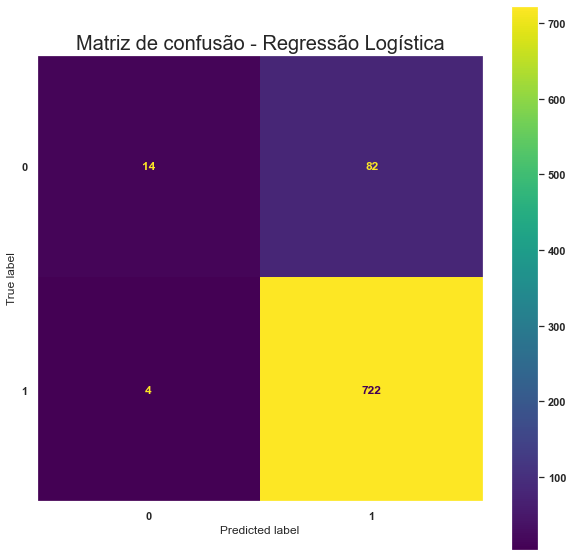

In [175]:
features_e_target = ['Status'].append(features)
log_reg_pred = pred_proba_df.applymap(lambda x: 1 if x > log_reg_best_thresh else 0)

print(metrics.classification_report(y_test, log_reg_pred[1]))
print(f"Confusion Matrix - Threshold = {log_reg_best_thresh}")
cmp1 = ConfusionMatrixDisplay(confusion_matrix(y_test, log_reg_pred[1]))
fig, ax = plt.subplots(figsize=(10,10))
plt.grid(False)
cmp1.plot(ax=ax)
plt.rc('font', **font)
plt.title('Matriz de confusão - Regressão Logística', fontsize = 20)
plt.show()

In [176]:
r_auc = roc_auc_score(y_test, log_reg_pred[1])
print('Regressão Logística = %.3f' % (r_auc))

Regressão Logística = 0.570


### __- 2º Modelo:__ KNN

In [177]:
# Loop para encontrar melhor K

knn_metric_combo_dict = {}

for k in range(1, 100):
    print (f'\n******** For k = {k} ******')
    
    knn = KNeighborsClassifier(n_neighbors = k, p = 3, metric = 'minkowski')
    knn.fit(X_train, y_train)
    
    knn_pred = knn.predict(X_test)
    print(metrics.classification_report(y_test, knn_pred, zero_division=1))
    
    knn_accuracy = metrics.accuracy_score(y_test, knn_pred)
    knn_recall = metrics.recall_score(y_test, knn_pred)
    knn_f1 = metrics.f1_score(y_test, knn_pred, zero_division = 1)
    knn_metric_combo = (knn_accuracy + knn_recall + knn_f1)/3
    print(f'--> Métrica Combinada: {knn_metric_combo}')
    
    knn_metric_combo_dict[k] = knn_metric_combo

knn_best_k = max(knn_metric_combo_dict, key=knn_metric_combo_dict.get)  # Pegar o K com maior valor de combo de métricas (Acurácia, Recall e F1-Score)


******** For k = 1 ******
              precision    recall  f1-score   support

           0       0.27      0.22      0.24        96
           1       0.90      0.92      0.91       726

    accuracy                           0.84       822
   macro avg       0.58      0.57      0.58       822
weighted avg       0.83      0.84      0.83       822

--> Métrica Combinada: 0.890369247777533

******** For k = 2 ******
              precision    recall  f1-score   support

           0       0.24      0.34      0.28        96
           1       0.91      0.85      0.88       726

    accuracy                           0.79       822
   macro avg       0.57      0.60      0.58       822
weighted avg       0.83      0.79      0.81       822

--> Métrica Combinada: 0.8416885971526815

******** For k = 3 ******
              precision    recall  f1-score   support

           0       0.48      0.14      0.21        96
           1       0.90      0.98      0.94       726

    accuracy      

In [178]:
print(f'Melhor K: {knn_best_k}')
print(f'Melhor Metric Combo: {knn_metric_combo_dict[knn_best_k]}')
print('\n****** Matriz Confusão - KNN Melhor K ******')
print(confusion_matrix(y_test, knn_pred))

Melhor K: 7
Melhor Metric Combo: 0.9430795242339635

****** Matriz Confusão - KNN Melhor K ******
[[  0  96]
 [  0 726]]


In [179]:
knn = KNeighborsClassifier(n_neighbors=knn_best_k, p=3, metric='minkowski').fit(X_train, y_train)
knn_pred = knn.predict(X_test)

In [180]:
knc_metric_combo_dict = {}
threshold_list = [.3, .4, .5, .505, .51, .55, .7, .9]

for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    
    knc_pred = pred_proba_df.applymap(lambda x: 1 if x > i else 0)
    knc_accuracy = metrics.accuracy_score(np.asmatrix(y_test).reshape(np.asmatrix(y_test).size,1),
                                           np.asmatrix(knc_pred.iloc[:,1]).reshape(np.asmatrix(knc_pred.iloc[:,1]).size,1))
    print('-> Acurácia: {}'.format(knc_accuracy))
    knc_recall = metrics.recall_score(np.asmatrix(y_test).reshape(np.asmatrix(y_test).size,1),
                                         np.asmatrix(knc_pred.iloc[:,1]).reshape(np.asmatrix(knc_pred.iloc[:,1]).size,1))
    print('-> Recall: {}'.format(knc_recall))
    knc_f1 = metrics.f1_score(np.asmatrix(y_test).reshape(np.asmatrix(y_test).size,1),
                                         np.asmatrix(knc_pred.iloc[:,1]).reshape(np.asmatrix(knc_pred.iloc[:,1]).size,1))
    print('-> F1-Score: {}'.format(knc_f1))
    
    knc_metric_combo = (knc_accuracy + knc_recall + knc_f1)/3
    print(f'-> Métrica Combinada: {knc_metric_combo}')
    
    knc_metric_combo_dict[i] = knc_metric_combo
    
    print(confusion_matrix(np.asmatrix(y_test).reshape(np.asmatrix(y_test).size,1),
                           np.asmatrix(knc_pred.iloc[:,1]).reshape(np.asmatrix(knc_pred.iloc[:,1]).size,1)))

knc_best_thresh = max(knc_metric_combo_dict, key=knc_metric_combo_dict.get)  # Pegar o i com maior valor de combo de métricas (Acurácia, Recall e F1-Score)


******** For i = 0.3 ******
-> Acurácia: 0.8953771289537713
-> Recall: 0.9944903581267218
-> F1-Score: 0.9437908496732025
-> Métrica Combinada: 0.9445527789178985
[[ 14  82]
 [  4 722]]

******** For i = 0.4 ******
-> Acurácia: 0.8953771289537713
-> Recall: 0.9862258953168044
-> F1-Score: 0.9433465085639
-> Métrica Combinada: 0.9416498442781586
[[ 20  76]
 [ 10 716]]

******** For i = 0.5 ******
-> Acurácia: 0.8990267639902676
-> Recall: 0.9820936639118457
-> F1-Score: 0.9449966865473823
-> Métrica Combinada: 0.9420390381498319
[[ 26  70]
 [ 13 713]]

******** For i = 0.505 ******
-> Acurácia: 0.8990267639902676
-> Recall: 0.9820936639118457
-> F1-Score: 0.9449966865473823
-> Métrica Combinada: 0.9420390381498319
[[ 26  70]
 [ 13 713]]

******** For i = 0.51 ******
-> Acurácia: 0.8990267639902676
-> Recall: 0.9820936639118457
-> F1-Score: 0.9449966865473823
-> Métrica Combinada: 0.9420390381498319
[[ 26  70]
 [ 13 713]]

******** For i = 0.55 ******
-> Acurácia: 0.9014598540145985
-> 

              precision    recall  f1-score   support

           0       0.78      0.15      0.25        96
           1       0.90      0.99      0.94       726

    accuracy                           0.90       822
   macro avg       0.84      0.57      0.59       822
weighted avg       0.88      0.90      0.86       822

Confusion Matrix - Threshold = 0.3


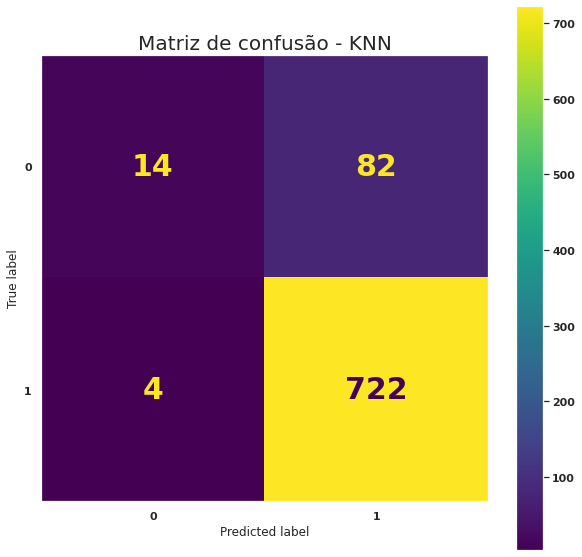

In [181]:
knc_pred = pred_proba_df.applymap(lambda x: 1 if x > knc_best_thresh else 0)

print(metrics.classification_report(y_test, knc_pred[1]))
print(f"Confusion Matrix - Threshold = {knc_best_thresh}")
cmp2 = ConfusionMatrixDisplay(confusion_matrix(y_test, knc_pred[1]))
fig, ax = plt.subplots(figsize=(10,10))
plt.grid(False)
cmp2.plot(ax=ax)
plt.rc('font', **font)
plt.title('Matriz de confusão - KNN', fontsize = 20)
plt.show()

In [182]:
 # Plotando o KNN e suas Fronteiras de Decisão etc
 
 #styles = ['ob', 'or', 'og', 'oy']
 #for c in range(knn_best_k):
 #    class_mask = (knn_pred==c)
 #    plt.plot(X_test[class_mask], X_test[class_mask], styles[c], markersize=10)
 #    plt.plot(X_test[class_mask], X_test[class_mask], 'kx', markersize=8)
 #plt.title('Synthetic data classification - KNN');

### __- 3º Modelo:__ GaussianNB usando CV 10 Fold

In [183]:
# Somente variáveis numéricas para esse modelo, então usaremos X_train_numericals e X_test_numericals

gaussNB = GaussianNB().fit(X_train_numericals, y_train)

gaussNB_metric_combo_dict = {}
threshold_list = [.3, .4, .5, .505, .51, .55, .7, .9]

for i in threshold_list:

    print ('\n******** For i = {} ******'.format(i))
    
    gaussNB_pred = pred_proba_df.applymap(lambda x: 1 if x > i else 0)
    gnb_accuracy = metrics.accuracy_score(np.asmatrix(y_test).reshape(np.asmatrix(y_test).size,1),
                                           np.asmatrix(gaussNB_pred.iloc[:,1]).reshape(np.asmatrix(gaussNB_pred.iloc[:,1]).size,1))
    print('-> Acurácia: {}'.format(gnb_accuracy))
    gnb_recall = metrics.recall_score(np.asmatrix(y_test).reshape(np.asmatrix(y_test).size,1),
                                         np.asmatrix(gaussNB_pred.iloc[:,1]).reshape(np.asmatrix(gaussNB_pred.iloc[:,1]).size,1))
    print('-> Recall: {}'.format(gnb_recall))
    gnb_f1 = metrics.f1_score(np.asmatrix(y_test).reshape(np.asmatrix(y_test).size,1),
                                         np.asmatrix(gaussNB_pred.iloc[:,1]).reshape(np.asmatrix(gaussNB_pred.iloc[:,1]).size,1))
    print('-> F1-Score: {}'.format(gnb_f1))
    
    gaussNB_metric_combo = (gnb_accuracy + gnb_recall + gnb_f1)/3
    print(f'-> Métrica Combinada: {gaussNB_metric_combo}')
    
    gaussNB_metric_combo_dict[i] = gaussNB_metric_combo
    
    print(confusion_matrix(np.asmatrix(y_test).reshape(np.asmatrix(y_test).size,1),
                           np.asmatrix(gaussNB_pred.iloc[:,1]).reshape(np.asmatrix(gaussNB_pred.iloc[:,1]).size,1)))

gaussNB_best_thresh = max(gaussNB_metric_combo_dict, key=gaussNB_metric_combo_dict.get)  # Pegar o i com maior valor de combo de métricas (Acurácia, Recall e F1-Score)


******** For i = 0.3 ******
-> Acurácia: 0.8953771289537713
-> Recall: 0.9944903581267218
-> F1-Score: 0.9437908496732025
-> Métrica Combinada: 0.9445527789178985
[[ 14  82]
 [  4 722]]

******** For i = 0.4 ******
-> Acurácia: 0.8953771289537713
-> Recall: 0.9862258953168044
-> F1-Score: 0.9433465085639
-> Métrica Combinada: 0.9416498442781586
[[ 20  76]
 [ 10 716]]

******** For i = 0.5 ******
-> Acurácia: 0.8990267639902676
-> Recall: 0.9820936639118457
-> F1-Score: 0.9449966865473823
-> Métrica Combinada: 0.9420390381498319
[[ 26  70]
 [ 13 713]]

******** For i = 0.505 ******
-> Acurácia: 0.8990267639902676
-> Recall: 0.9820936639118457
-> F1-Score: 0.9449966865473823
-> Métrica Combinada: 0.9420390381498319
[[ 26  70]
 [ 13 713]]

******** For i = 0.51 ******
-> Acurácia: 0.8990267639902676
-> Recall: 0.9820936639118457
-> F1-Score: 0.9449966865473823
-> Métrica Combinada: 0.9420390381498319
[[ 26  70]
 [ 13 713]]

******** For i = 0.55 ******
-> Acurácia: 0.9014598540145985
-> 

              precision    recall  f1-score   support

           0       0.78      0.15      0.25        96
           1       0.90      0.99      0.94       726

    accuracy                           0.90       822
   macro avg       0.84      0.57      0.59       822
weighted avg       0.88      0.90      0.86       822

Confusion Matrix - Threshold = 0.3


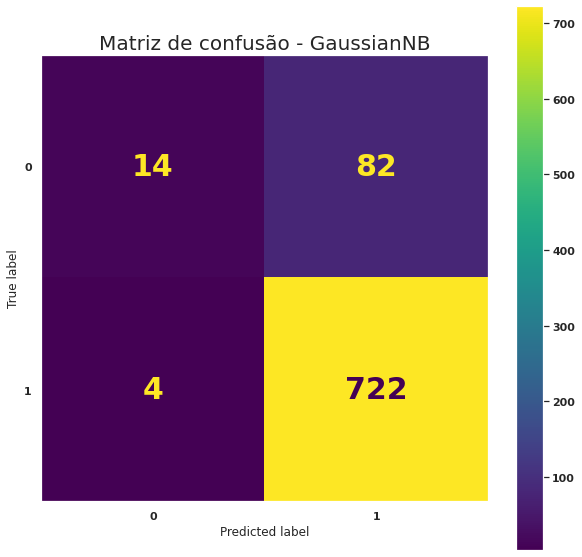

In [184]:
gaussNB_pred = pred_proba_df.applymap(lambda x: 1 if x > gaussNB_best_thresh else 0)

print(metrics.classification_report(y_test, gaussNB_pred[1]))
print(f"Confusion Matrix - Threshold = {gaussNB_best_thresh}")
cmp3 = ConfusionMatrixDisplay(confusion_matrix(y_test, gaussNB_pred[1]))
fig, ax = plt.subplots(figsize=(10,10))
plt.grid(False)
cmp3.plot(ax=ax)
plt.rc('font', **font)
plt.title('Matriz de confusão - GaussianNB', fontsize = 20)
plt.show()

### __- 4º Modelo:__ Random Forest Classifier usando CV 10 Fold

In [185]:
rfclassifier = RandomForestClassifier(random_state=42)
param_dict = {'n_estimators': [10, 50, 100, 200, 500],
              'max_depth': [2, 3, 4, 5],
               }

gridsearch_rfclf = GridSearchCV(rfclassifier,
                              param_grid=param_dict,
                              cv=10,
                              scoring=['accuracy', 'recall', 'f1'],
                              n_jobs=-1,
                              verbose = 2,
                              refit = 'accuracy'
                              )
                              
results_gsclf = gridsearch_rfclf.fit(X_train, y_train)

# pd.DataFrame(gridsearch_clf.cv_results_)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   14.0s finished


In [186]:
# gridsearch_clf.best_score_
results_gsclf.best_params_

{'max_depth': 5, 'n_estimators': 500}

              precision    recall  f1-score   support

           0       0.84      0.27      0.41        96
           1       0.91      0.99      0.95       726

    accuracy                           0.91       822
   macro avg       0.88      0.63      0.68       822
weighted avg       0.90      0.91      0.89       822

[[ 26  70]
 [  5 721]]


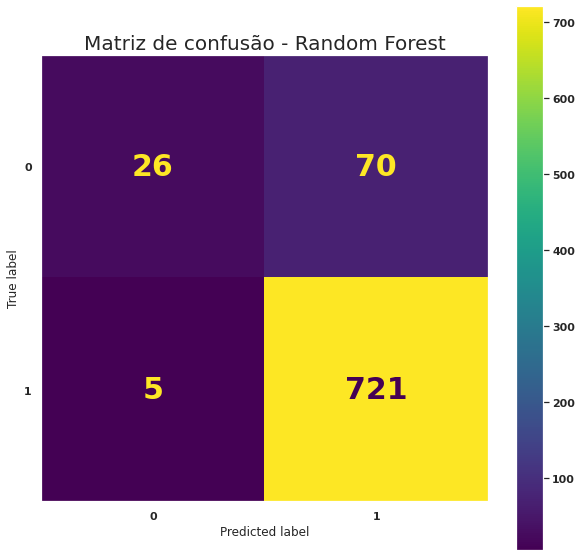

In [187]:
print(metrics.classification_report(y_test, gridsearch_rfclf.predict(X_test)))
print(confusion_matrix(y_test, gridsearch_rfclf.predict(X_test)))
cmp4 = ConfusionMatrixDisplay(confusion_matrix(y_test, gridsearch_rfclf.predict(X_test)))
fig, ax = plt.subplots(figsize=(10,10))
plt.grid(False)
cmp4.plot(ax=ax)
plt.rc('font', **font)
plt.title('Matriz de confusão - Random Forest', fontsize = 20)
plt.show()

### __- 5º Modelo:__ XGBoost Classifier usando CV 10 Fold

In [188]:
#XGBClassifier cru (com TODAS as features e inalteradas, e também sem simetria, apenas stratify no split)

xgbc = XGBClassifier(label_encoder = False, eval_metric = 'logloss', random_state = 42)
xgbc.fit(X_train_todas_feats, y_train_todas_feats)
xgbc_pred = xgbc.predict(X_test_todas_feats)

print(metrics.classification_report(y_test_todas_feats, xgbc_pred))
print(confusion_matrix(y_test_todas_feats, xgbc_pred))

[18:45:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "label_encoder" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


              precision    recall  f1-score   support

           0       0.65      0.41      0.50        96
           1       0.93      0.97      0.95       726

    accuracy                           0.91       822
   macro avg       0.79      0.69      0.72       822
weighted avg       0.89      0.91      0.90       822

[[ 39  57]
 [ 21 705]]


In [189]:
#XGBClassifier com Features Selecionadas

xgbc = XGBClassifier(label_encoder = False, eval_metric = 'logloss', random_state = 42)
xgbc.fit(X_train, y_train)
xgbc_pred = xgbc.predict(X_test)

print(metrics.classification_report(y_test, xgbc_pred))
print(confusion_matrix(y_test, xgbc_pred))

[18:45:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "label_encoder" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


              precision    recall  f1-score   support

           0       0.62      0.39      0.47        96
           1       0.92      0.97      0.94       726

    accuracy                           0.90       822
   macro avg       0.77      0.68      0.71       822
weighted avg       0.89      0.90      0.89       822

[[ 37  59]
 [ 23 703]]


In [190]:
xgbclassifier = XGBClassifier(eval_metric = 'logloss', use_label_encoder = False, random_state = 42)

param_dict = {'n_estimators': [5, 10, 50],
              'max_depth': [3, 5, 7],
              'gamma': [1, 1.5, 2],
              'subsample': [1.0],
              'colsample_bytree': [0.4, 0.6],
              'min_child_weight': [0.3, 0.5, 1],
              'learning_rate': [0.1, 0.2, 0.3]
               }

gridsearch_xgbclf  =   GridSearchCV(xgbclassifier,
                                    param_grid = param_dict,
                                    cv = 5,
                                    scoring = ['accuracy', 'recall', 'f1'],
                                    refit = 'accuracy',
                                    verbose = 2,
                                    n_jobs = -1
                                    )

results_gsclf = gridsearch_xgbclf.fit(X_train_todas_feats, y_train_todas_feats)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 432 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 1244 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 2430 out of 2430 | elapsed:   17.9s finished


In [191]:
results_gsclf.best_params_

{'colsample_bytree': 0.6,
 'gamma': 1,
 'learning_rate': 0.3,
 'max_depth': 5,
 'min_child_weight': 0.5,
 'n_estimators': 10,
 'subsample': 1.0}

      ************* Melhor XGBoost Classifier **************
              precision    recall  f1-score   support

           0       0.67      0.41      0.51        96
           1       0.93      0.97      0.95       726

    accuracy                           0.91       822
   macro avg       0.80      0.69      0.73       822
weighted avg       0.90      0.91      0.90       822

Acurácia:  0.9075
Recall:    0.9738


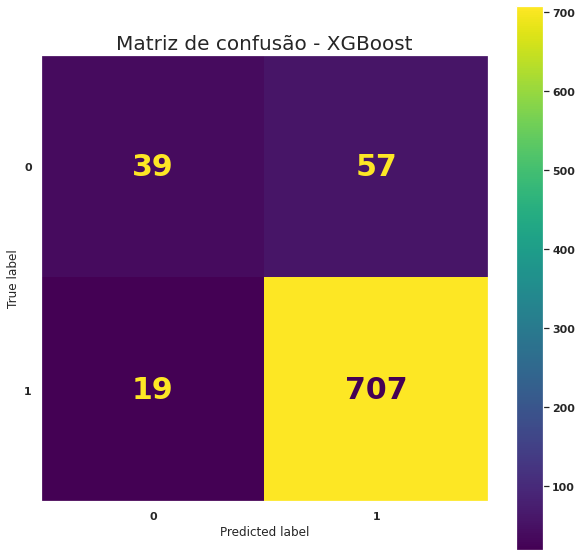

In [192]:
print('      ************* Melhor XGBoost Classifier **************')
print(metrics.classification_report(y_test_todas_feats, gridsearch_xgbclf.predict(X_test_todas_feats)))
print('Acurácia: ', metrics.accuracy_score(y_test_todas_feats, gridsearch_xgbclf.predict(X_test_todas_feats)).round(4))
print('Recall:   ', metrics.recall_score(y_test_todas_feats, gridsearch_xgbclf.predict(X_test_todas_feats)).round(4))
cmp5 = ConfusionMatrixDisplay(confusion_matrix(y_test_todas_feats, gridsearch_xgbclf.predict(X_test_todas_feats)))
fig, ax = plt.subplots(figsize=(10,10))
plt.grid(False)
cmp5.plot(ax=ax)
plt.rc('font', **font)
plt.title('Matriz de confusão - XGBoost', fontsize = 20)
plt.show()

In [193]:
r_auc = roc_auc_score(y_test, log_reg_pred[1])
knn_auc = roc_auc_score(y_test, knc_pred[1])
nb_auc = roc_auc_score(y_test, gaussNB_pred[1])
rf_auc = roc_auc_score(y_test, gridsearch_rfclf.predict(X_test))
xg_auc = roc_auc_score(y_test_todas_feats, gridsearch_xgbclf.predict(X_test_todas_feats))

In [194]:
r_fpr, r_tpr, _ = roc_curve(y_test, log_reg_pred[1]) #reg log
knn_fpr, knn_tpr, _ = roc_curve(y_test, knc_pred[1]) # KNN
nb_fpr, nb_tpr, _ = roc_curve(y_test, gaussNB_pred[1]) # Naive Bayes
rf_fpr, rf_tpr, _ = roc_curve(y_test, gridsearch_rfclf.predict(X_test)) # Random Forest
xg_fpr, xg_tpr, _ = roc_curve(y_test_todas_feats, gridsearch_xgbclf.predict(X_test_todas_feats)) # XGBoost

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


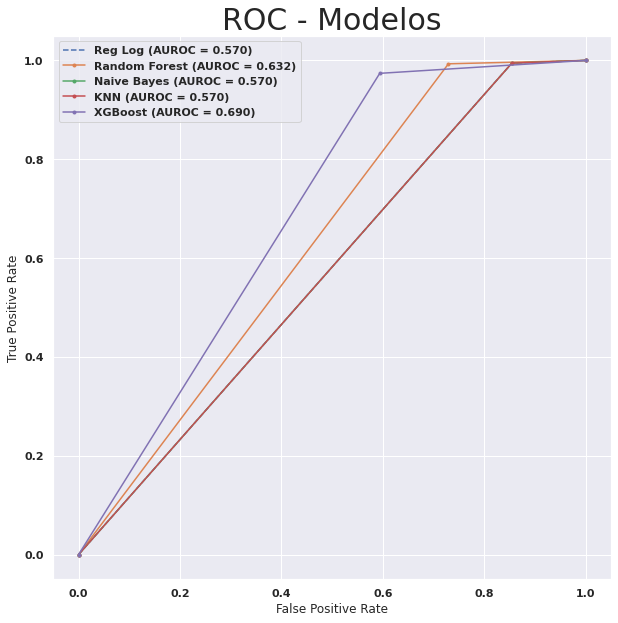

In [195]:

fig, ax = plt.subplots(figsize=(10,10))
plt.plot(r_fpr, r_tpr, linestyle='--', label='Reg Log (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes (AUROC = %0.3f)' % nb_auc)
plt.plot(knn_fpr, knn_tpr, marker='.', label='KNN (AUROC = %0.3f)' % knn_auc)
plt.plot(xg_fpr, xg_tpr, marker='.', label='XGBoost (AUROC = %0.3f)' % xg_auc)

# Title
plt.title('ROC - Modelos', fontsize = 30)
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()


Fim